### L1 Trend Filtering

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cvxpy as cp
import scipy as sp

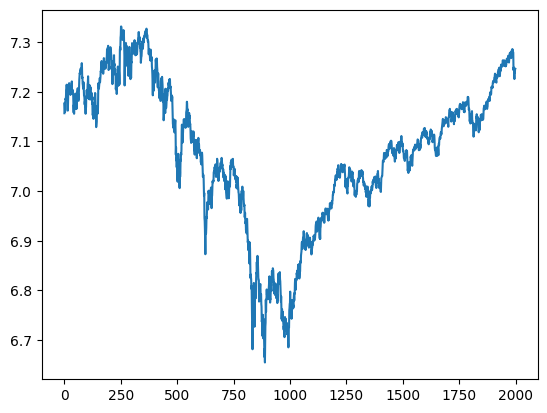

In [17]:
#Load text file and convert to pandas dataframe
data = pd.DataFrame(np.loadtxt('../data/sp500.txt'))
m = data.shape[0]
plt.plot(data)

In [48]:
ones = np.ones(2000)
D = sp.sparse.spdiags([ones, -2*ones, ones], np.array([0, 1, 2]), 1998, 2000).toarray()

y = cp.Variable((2000, 1))
lam = 50

obj1 = cp.norm2(y - data)
obj2 = cp.norm1(D@y)
obj = 0.5 * obj1 + lam * obj2

cp.Problem(cp.Minimize(obj)).solve()

1.041223719271356

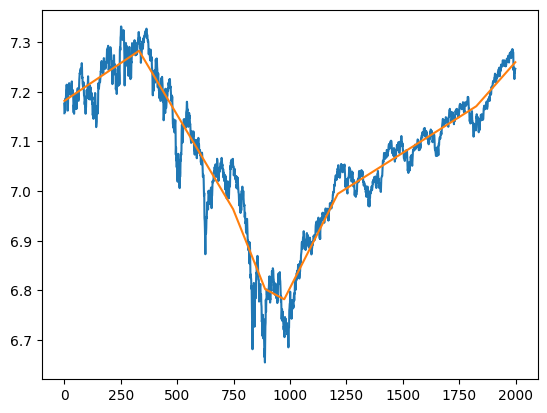

In [49]:
plt.plot(data)
plt.plot(y.value)

Status: optimal


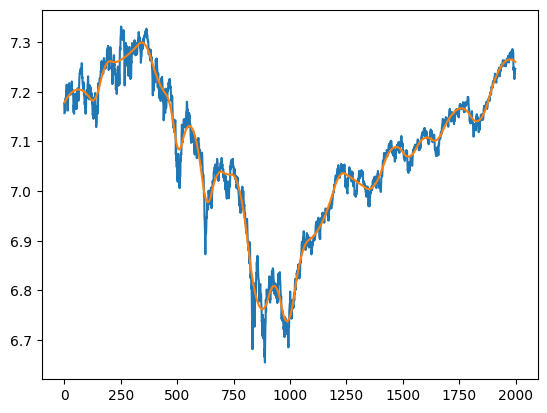

In [63]:
import numpy as np
from scipy.sparse import diags

def third_order_difference_matrix(n):
    diagonals = [
        np.ones(n - 3),
        -3 * np.ones(n - 2),
        3 * np.ones(n - 1),
        -1 * np.ones(n)
    ]
    offsets = [0, 1, 2, 3]
    D3 = diags(diagonals, offsets, shape=(n - 3, n)).toarray()
    return D3

n = 2000  # desired dimension of the matrix
D = third_order_difference_matrix(n)

ones = np.ones(2000)

y = cp.Variable((2000, 1))
lam = 30

obj1 = cp.norm2(y - data)
obj2 = cp.norm1(D@y)
obj = 0.5 * obj1 + lam * obj2

prob=cp.Problem(cp.Minimize(obj))
prob.solve()

print("Status:", prob.status)

plt.plot(data)
plt.plot(y.value)